# 1- proceso de ETL

In [1]:
# importar bibliotecas:

import pandas as pd
import ast
import json
import fun # Funciones propias creadas
import chardet # Biblioteca para detectar la codificacion de caracteres utilizada en un texto o archivo


### Descomprimir archivos ".Gz"

##### Llamado de la funcion y ejecucion del proceso de extraccion

In [14]:
dpath = 'S:\\PROYECTO INDIVIDUAL Nº1\\steam\\ETL_y_EDA'
#'S:\\HENRY\\DATA\\DataFt14-Proyecto individual\\PI MLOps - STEAM' # se define la ruta de donde estan los archivos ".GZ"
fun.gz_extract(dpath) # se llama a la funcion para su ejecucion

Descomprimido y eliminado: steam_games.json
Descomprimido y eliminado: users_items.json
Descomprimido y eliminado: user_reviews.json


### Tipo de encouding de cada archivo ".json"

In [15]:
# Encouding steam_games
with open("steam_games.json", 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
print(f"La codificación del archivo steam_games es: {encoding}")


# Encouding user_reviews
with open("user_reviews.json", 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
print(f"La codificación del archivo user_reviews es: {encoding}")

# Encouding user_items
with open("users_items.json", 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
print(f"La codificación del archivo users_items es: {encoding}")


La codificación del archivo steam_games es: ascii
La codificación del archivo user_reviews es: MacRoman


## Resumen

- Se encuentran 3 datasets en formato json pero se observan que estan comprimidos en un formato 'Gzip', así que se procede a descomprimirlos mediante una funcion la cual lee todos los archivos de un carpeta que se especifica y extrae solo los que tengan la extension ".GZ", se podria extraer de igual manera mediante la utilizacion de winrar pero la herramienta mencionada no me funciona muy bien.

- Luego de descomprimir los archivos y antes de abrirlo se procede a revisar el encouding de cada uno con el fin de al momento de pasarlos a un Data Frame este no genera problemas por el tipo de encouding y a la veces no usar "utf-8" ya esto puede generar alteracion de caracteres y la imposibilidad de realizar un buen anilisis de datos, se observa lo siguiente:

    - steam_games.json = encoding ASCII
    - users_reviews.json = encoding MacRoman
    - user_items.json.json = encoding MacRoman <br>
<br>

### Previsualización

- Por medio de Visual Studio Code se puede ver a groso modo los datos de los archivo '.json' 

<br>
<p align="center">
 Archivo steam_games.json:
</p>

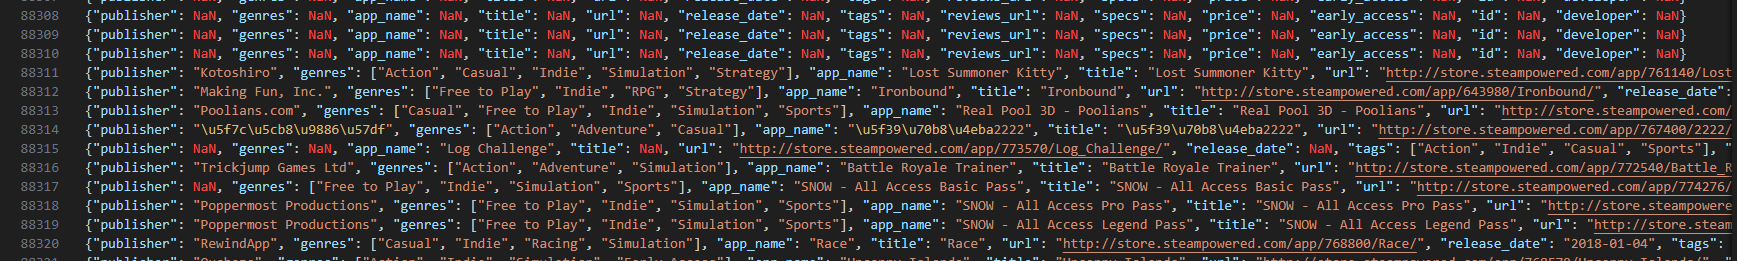

--> No se visualizan datos anidados pero si una gran cantidad de datos NAN

<br>
<p align="center">
 Archivo user_reviews.json:
</p>

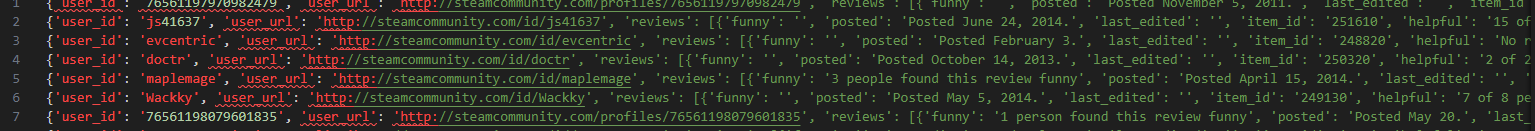

--> Se observan datos anidados en la columna reviews

<br>
<p align="center">
 Archivo users_items.json:
</p>

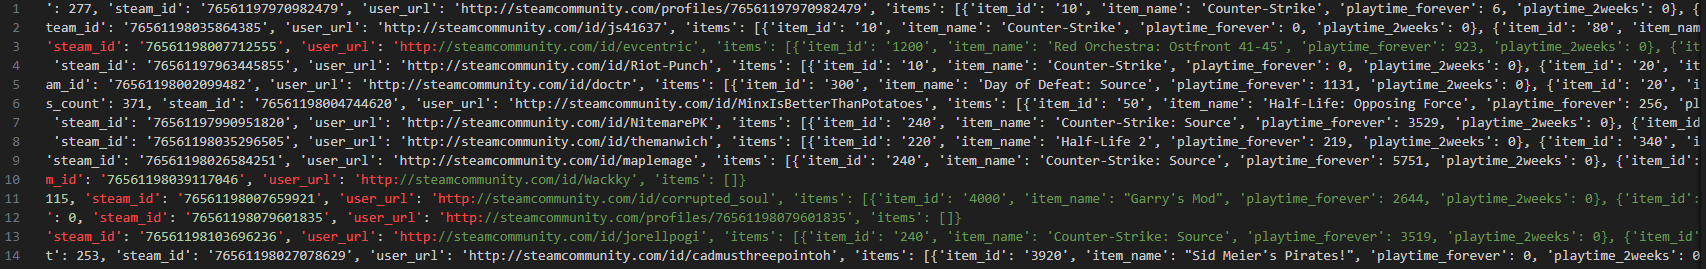



# LEER DATOS
### --> STEAM GAMES

In [2]:
# se establece el parametro 'lines=True' en el cual cada linea representa un objeto json independiente y se carga en DF como una fila separada.
games = pd.read_json(r"S:\Proyecto\PI MLOps - STEAM\steam_games.json", encoding='ascii',  lines = True)

In [6]:
# Verificar tipo de dato de cada columna, % de Nulos y % no Nulos y verificacion de filas completamente nulas
fun.tipo_dato(games)

publisher (nulos) =  96362
genres (nulos) =  91593
app_name (nulos) =  88312
title (nulos) =  90360
url (nulos) =  88310
release_date (nulos) =  90377
tags (nulos) =  88473
reviews_url (nulos) =  88312
specs (nulos) =  88980
price (nulos) =  89687
early_access (nulos) =  88310
id (nulos) =  88312
developer (nulos) =  91609

 filas completamente nulas:  88310


,Nombre_Columna,Tipo_dato,%_No_nulos,%_Nulos
0,publisher,"[<class 'NoneType'>, <class 'str'>]",20.00,80.00
1,genres,"[<class 'NoneType'>, <class 'list'>]",23.95,76.05
2,app_name,"[<class 'NoneType'>, <class 'str'>]",26.68,73.32
3,title,"[<class 'NoneType'>, <class 'str'>]",24.98,75.02
4,url,"[<class 'NoneType'>, <class 'str'>]",26.68,73.32
5,release_date,"[<class 'NoneType'>, <class 'str'>]",24.96,75.04
6,tags,"[<class 'NoneType'>, <class 'list'>]",26.54,73.46
7,reviews_url,"[<class 'NoneType'>, <class 'str'>]",26.68,73.32
8,specs,"[<class 'NoneType'>, <class 'list'>]",26.12,73.88
9,price,"[<class 'NoneType'>, <class 'float'>, <class '...",25.54,74.46


In [7]:
# Se eliminan todas las 88310 filas completamente nulas
games = games.dropna(how='all').reset_index(drop=True)

In [8]:
# Guardar el df con la información de "steam_games.json" en formato CSV
games.to_csv('steam_games.csv', index=False)

### --> USERS_ITEMS

In [9]:
# Se lee de cada línea del dataset
filas=[]
with open(r"S:\HENRY\DATA\DataFt14-Proyecto individual\PI MLOps - STEAM\users_items.json",encoding="MacRoman")as file:
    for i in file.readlines():
        filas.append(ast.literal_eval(i))
items=pd.DataFrame(filas)

In [11]:
items.head(3)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."


#### La columna 'items' tiene datos anidados, para desanidar, se usara la funcion 'pd.json_normalize' de la biblioteca pandas para normalizar estos datos 

In [12]:
items = pd.json_normalize(filas, record_path=['items'], meta=['steam_id','items_count','user_id', 'user_url'])
items.head(5)

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


In [13]:
fun.tipo_dato(items)

item_id (nulos) =  0
item_name (nulos) =  0
playtime_forever (nulos) =  0
playtime_2weeks (nulos) =  0
steam_id (nulos) =  0
items_count (nulos) =  0
user_id (nulos) =  0
user_url (nulos) =  0

 filas completamente nulas:  0


,Nombre_Columna,Tipo_dato,%_No_nulos,%_Nulos
0,item_id,[<class 'str'>],100.0,0.0
1,item_name,[<class 'str'>],100.0,0.0
2,playtime_forever,[<class 'int'>],100.0,0.0
3,playtime_2weeks,[<class 'int'>],100.0,0.0
4,steam_id,[<class 'str'>],100.0,0.0
5,items_count,[<class 'int'>],100.0,0.0
6,user_id,[<class 'str'>],100.0,0.0
7,user_url,[<class 'str'>],100.0,0.0


In [14]:
# Guardar el df con la información de "steam_games.json" en formato CSV
items.to_csv('user_items.csv', index=False)

### --> USERS_REVIEWS

In [15]:
# Se lee de cada línea del dataset
filas_review = []
with open(r"S:\HENRY\DATA\DataFt14-Proyecto individual\PI MLOps - STEAM\user_reviews.json",encoding="MacRoman")as f:
    for line in f.readlines():
        filas_review.append(ast.literal_eval(line))

# Se convierte en dataframe
reviews = pd.DataFrame(filas_review)

In [16]:
# Crear una nueva lista para almacenar las filas expandidas
filas_expandidas = []
# Iterar sobre cada fila del DataFrame
for index, fila in reviews.iterrows():
    # Iterar sobre cada diccionario en la lista 'reviews' de la fila actual
    for review in fila['reviews']:
        # Crear una nueva fila con valores de 'user_id' y 'user_url' repetidos y valores del diccionario
        new_row = {
            'user_id': fila['user_id'],
            'user_url': fila['user_url'],
            'item_id': review['item_id'],
            'funny': review['funny'],
            'posted': review['posted'],
            'last_edited': review['last_edited'],
            'helpful': review['helpful'],
            'recommend': review['recommend'],
            'review': review['review']
        }
        filas_expandidas.append(new_row)
# Crear un nuevo DataFrame con las filas expandidas
reviews1 = pd.DataFrame(filas_expandidas)

In [18]:
fun.tipo_dato(reviews1)

user_id (nulos) =  0
user_url (nulos) =  0
item_id (nulos) =  0
funny (nulos) =  0
posted (nulos) =  0
last_edited (nulos) =  0
helpful (nulos) =  0
recommend (nulos) =  0
review (nulos) =  0

 filas completamente nulas:  0


,Nombre_Columna,Tipo_dato,%_No_nulos,%_Nulos
0,user_id,[<class 'str'>],100.0,0.0
1,user_url,[<class 'str'>],100.0,0.0
2,item_id,[<class 'str'>],100.0,0.0
3,funny,[<class 'str'>],100.0,0.0
4,posted,[<class 'str'>],100.0,0.0
5,last_edited,[<class 'str'>],100.0,0.0
6,helpful,[<class 'str'>],100.0,0.0
7,recommend,[<class 'bool'>],100.0,0.0
8,review,[<class 'str'>],100.0,0.0


In [19]:
# Guardar el df con la información de "steam_games.json" en formato CSV
reviews1.to_csv('user_reviews.csv', index=False)

## Observaciones:

- Se exporto cada dataset a un archivo CSV independiente de la siguiente forma:

    - Archivo "output_steam_games.json" = etl_games.csv
    - Archivo "australian_user_reviews.json" = etl_reviews.csv
    - Archivo "australian_users_items.json" = etl_items.csv